In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('all.csv')

choc = df[df['product'] == 'CHOCOLATE']['mid_price']
strawb = df[df['product'] == 'STRAWBERRIES']['mid_price']
roses = df[df['product'] == 'ROSES']['mid_price']
basket = df[df['product'] == 'GIFT_BASKET']['mid_price']


combined = 6 * strawb + 4 * choc + roses

choc = choc.to_list()
strawb = strawb.to_list()
roses = roses.to_list()
basket = basket.to_list()

lis = [strawb[i]*6 + choc[i]*4 + roses[i] for i in range(len(strawb))]


# create new dataframe
df2 = pd.DataFrame()
df2['combined'] = lis
df2['combined'] = df2['combined'] + 381
df2['basket'] = basket


76.42310842343251 1.5095166666666666


<Axes: >

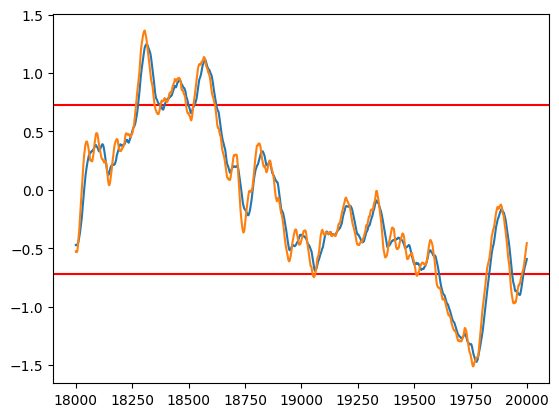

In [184]:
spread = df2['combined'] - df2['basket']
sd = np.std(spread)
mean = np.mean(spread)
print(sd, mean)
zscores = (spread - mean) / sd

# histogram
# plt.hist(df2['zscores'], bins=10)
# plt.xlabel('Z-Score')
# plt.ylabel('Frequency')

realz = zscores
plt.axhline(y=55/76, color='r', linestyle='-')
plt.axhline(y=-55/76, color='r', linestyle='-')
zscores.rolling(window=50).mean()[18000:20000].plot()
zscores.rolling(window=30).mean()[18000:20000].plot()


<Axes: >

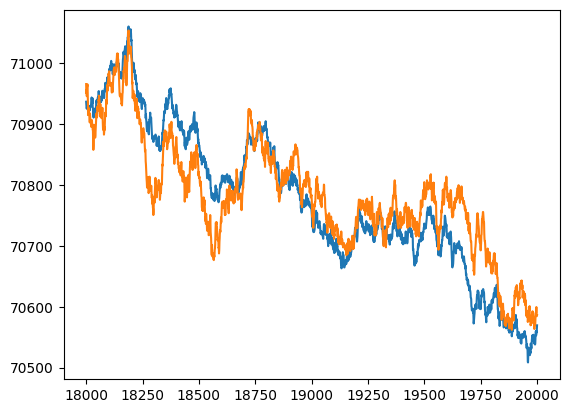

In [185]:
df2['combined'][18000:20000].plot()
df2['basket'][18000:20000].plot()

<Axes: >

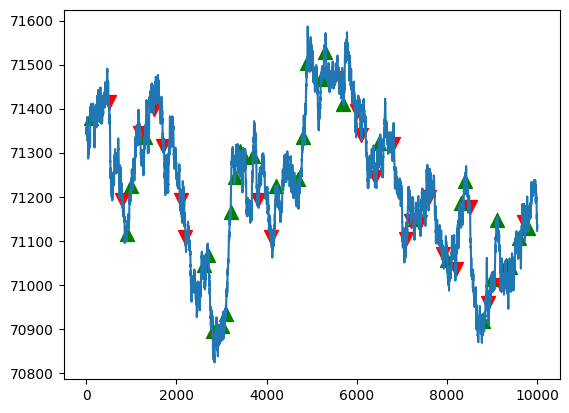

In [186]:
opens = [100.0, 900.0, 1000.0, 1300.0, 2600.0, 2700.0, 2800.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3700.0, 4200.0, 4700.0, 4800.0, 4900.0, 5200.0, 5300.0, 5700.0, 6500.0, 7300.0, 8000.0, 8300.0, 8400.0, 8800.0, 9000.0, 9100.0, 9300.0, 9400.0, 9600.0, 9800.0]
closes =  [500.0, 800.0, 1200.0, 1500.0, 1700.0, 2100.0, 2200.0, 2900.0, 3800.0, 4100.0, 5500.0, 6000.0, 6100.0, 6400.0, 6800.0, 7100.0, 7200.0, 7400.0, 7600.0, 7900.0, 8200.0, 8500.0, 8900.0, 9200.0, 9700.0]

#plot opens as green triangles
plt.scatter(opens, df2['basket'][opens], color='g', marker='^', s=100)
#plot closes as red triangles
plt.scatter(closes, df2['basket'][closes], color='r', marker='v', s=100)
df2['basket'][:10000].plot()
# enable zooming in on plo

In [187]:
# df3 = pd.DataFrame()
# df3['straw'] = strawb
# # df3['straw'].plot()
# df3['straw'].rolling(window=400).mean().plot()
# df3['straw'].rolling(window=800).mean().plot()

In [188]:
# from statsmodels.tsa.stattools import adfuller
# df3['choc'] = choc
# result = adfuller(df3['choc'])
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
